# Analisis Regresi Linear Berganda








## Latar Belakang


Untuk melakukan analisis korelasi antar kolom data dan regresi linier, kita perlu menentukan variabel-variabel penjelas (independent variables) dan variabel respon (dependent variable).

Variabel-variabel penjelas adalah variabel yang digunakan untuk menjelaskan atau memprediksi variabel respon. Sementara itu, variabel respon adalah variabel yang ingin kita prediksi atau menjelaskan dengan menggunakan variabel-variabel penjelas.

## Import library library yang digunakan.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f
import matplotlib.pyplot as plt
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 17.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Data Preprocessing

### Memasukkan dataset ke data frame.

In [ ]:
#import data
data = pd.read_csv("https://github.com/Nwulanhan/Analisa-Data-TUBES/blob/main/factbook%202.csv?raw=true")
data.head()

,Country,Area,Birth_rate,Current account balance,Death_rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,LifeExpBirth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,Asia,9.47,17020000000000,8.95,971000000000,1044000000000,538.0,3745000000000,29400,...,81.15,1.0,80420000000,5290000,127417244,164.3,23705.0,664600000000,1.39,4.7
1,Germany,Europe,8.33,7359000000000,10.55,519500000000,560000000000,893.0,2362000000000,28700,...,78.65,1.5,99550000000,2891000,82431390,65.8,46039.0,96840000000,1.39,10.6
2,Saudi Arabia,Asia,29.56,5150000000000,2.62,128500000000,138200000000,110.0,310200000000,12000,...,75.46,10.0,56400000000,1550000,26417599,75.0,1392.0,23620000000,4.05,25.0
3,Russia,Europe,9.80,4604000000000,14.52,894300000000,915000000000,162.0,1408000000000,9800,...,67.10,0.0,405800000000,2310000,143420309,28.2,87157.0,124500000000,1.27,8.3
4,Switzerland,Europe,9.77,4095000000000,8.48,54530000000,63470000000,130.0,251900000000,33800,...,80.39,1.0,3093000000,290400,7489370,57.2,4533.0,69580000000,1.42,3.4


### Cleaning Data

In [ ]:
# Cleaning data
data['GDP'] = data['GDP'].apply(lambda x: str(x).replace('.00', ''))
data['Natural gas consumption'] = data['Natural gas consumption'].apply(lambda x: str(x).replace('.00', ''))
data['Reserves of foreign exchange & gold'] = data['Reserves of foreign exchange & gold'].apply(lambda x: str(x).replace('.00', ''))
data['Current account balance'] = data['Current account balance'].apply(lambda x: str(x).replace('.00', ''))
data = data.replace({',': '', '\$': '', '\.': '', '\.00': ''}, regex=True)
data.head()
data = pd.DataFrame(data)
data.to_excel('data.xlsx', index=False)

### Memilih Atribut yang Diperlukan

In [ ]:
# Select atribut yang diperlukan
selected_col = ['Exports', 'Imports',  'Industrial production growth rate', 'Investment',  'Unemployment rate', 'GDP']
df = data[selected_col]


# Mengganti nama kolom
df.rename(columns = {'Exports':'Exports (x1)', 'Imports':'Imports (x2)', 'Industrial production growth rate':'Industrial production growth rate (x3)', 'Investment':'Investment (x4)', 'Unemployment rate':'Unemployment rate (x5)', 'GDP':'GDP (y)'}, inplace=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Mengubah isi data yang NaN menjadi 0

In [ ]:
# Mengubah isi data yang NaN menjadi 0
df = df.replace(r'^\s*$', 0, regex=True)
df = df.fillna(0)

### Mengubah tipe data menjadi numerik

In [ ]:
df = df.astype(float)

### Mengganti nama kolom

In [ ]:
df.rename(columns = {'Exports':'Exports (x1)', 'Imports':'Imports (x2)', 'Industrial production growth rate':'Industrial production growth rate (x3)', 'Investment':'Investment (x4)', 'Unemployment rate':'Unemployment rate (x5)', 'GDP':'GDP (y)'}, inplace=True)

In [ ]:
df.head()

,Exports (x1),Imports (x2),Industrial production growth rate (x3),Investment (x4),Unemployment rate (x5),GDP (y)
0,538.0,4.018000e+11,6.6,24.0,4.7,3.745000e+12
1,893.0,7.167000e+11,2.2,17.6,10.6,2.362000e+12
2,110.0,3.621000e+10,2.8,17.2,25.0,3.102000e+11
3,162.0,9.291000e+10,6.4,19.1,8.3,1.408000e+12
4,130.0,1.211000e+11,4.7,20.4,3.4,2.519000e+11


### Visualisasi

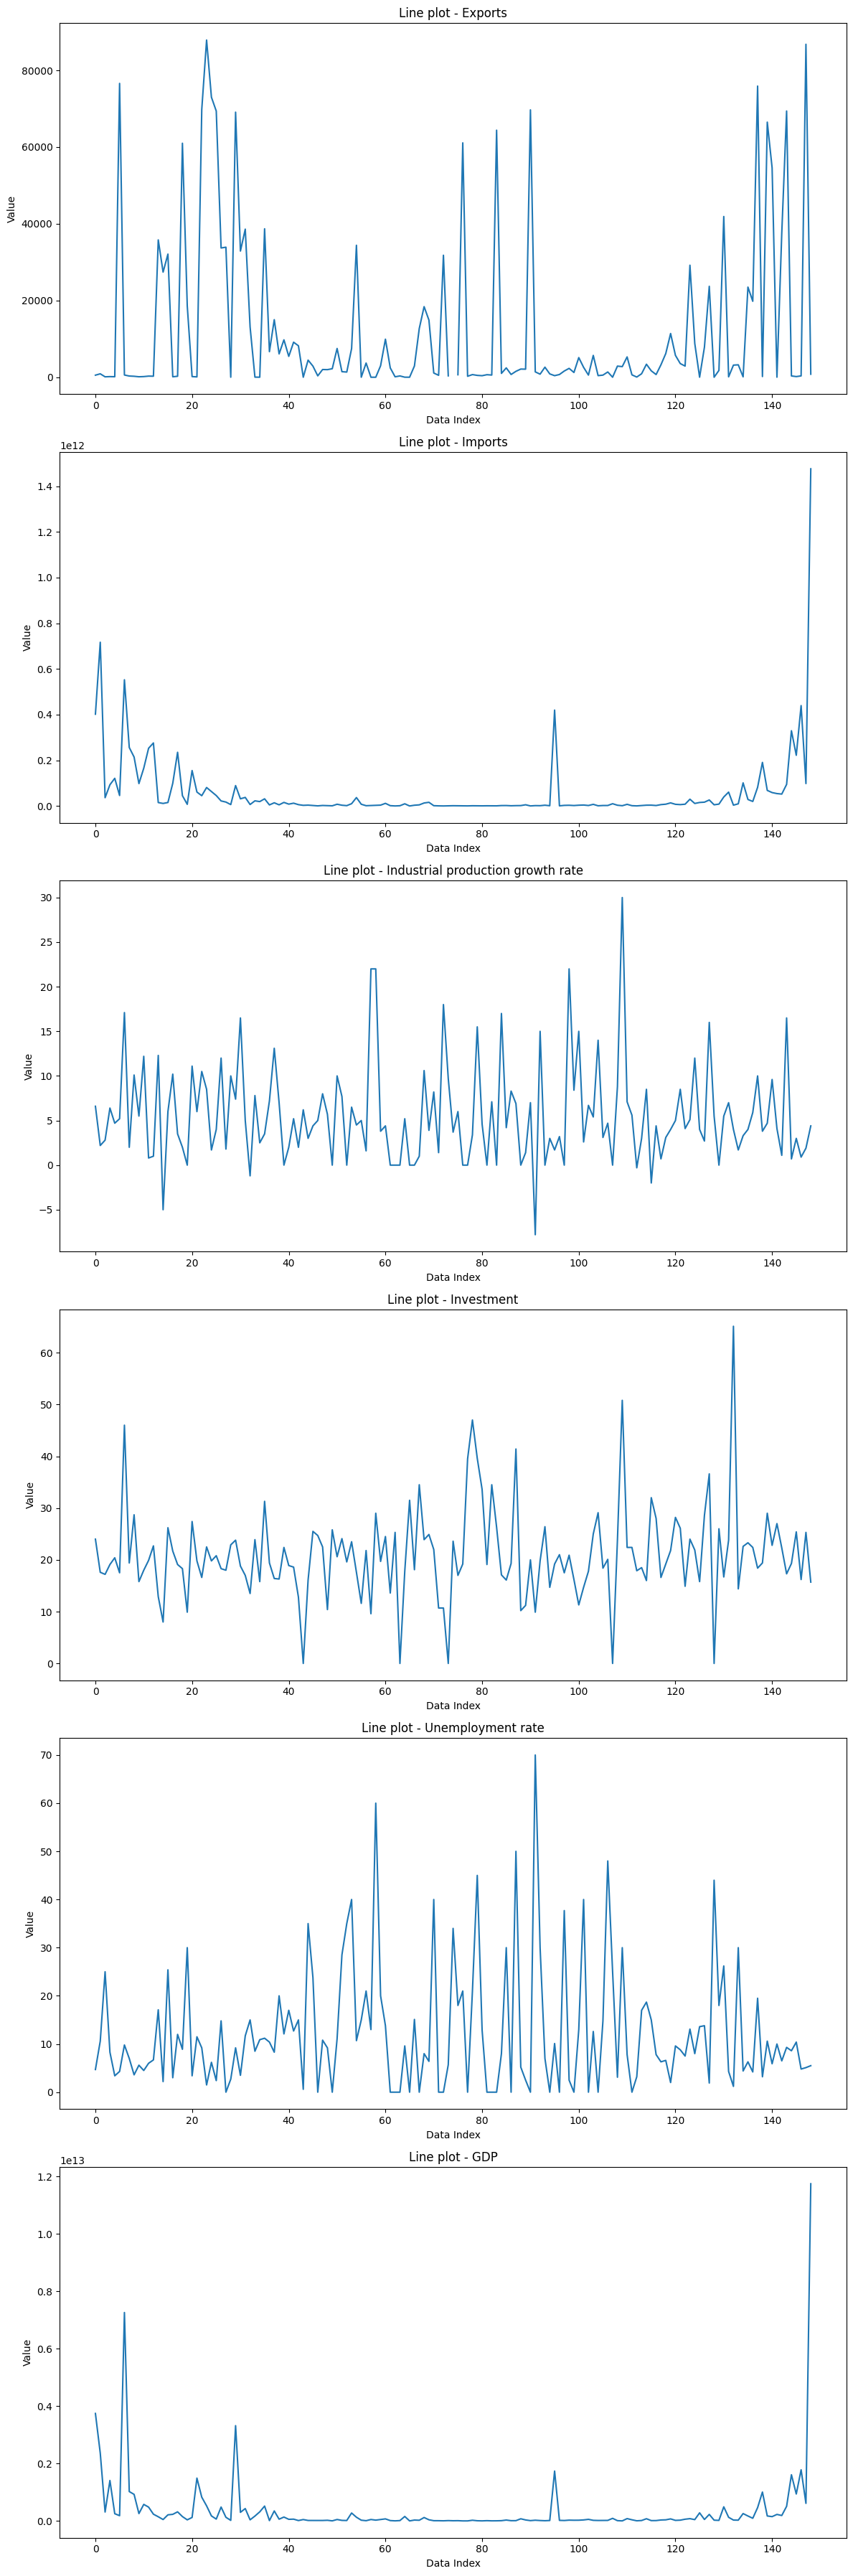

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(selected_col), 1, figsize=(12, 6*len(selected_col)))

for i, column in enumerate(selected_col):
    axes[i].plot(data[column])
    axes[i].set(xlabel='Data Index', ylabel='Value', title='Line plot - {}'.format(column))

fig.tight_layout()
plt.show()



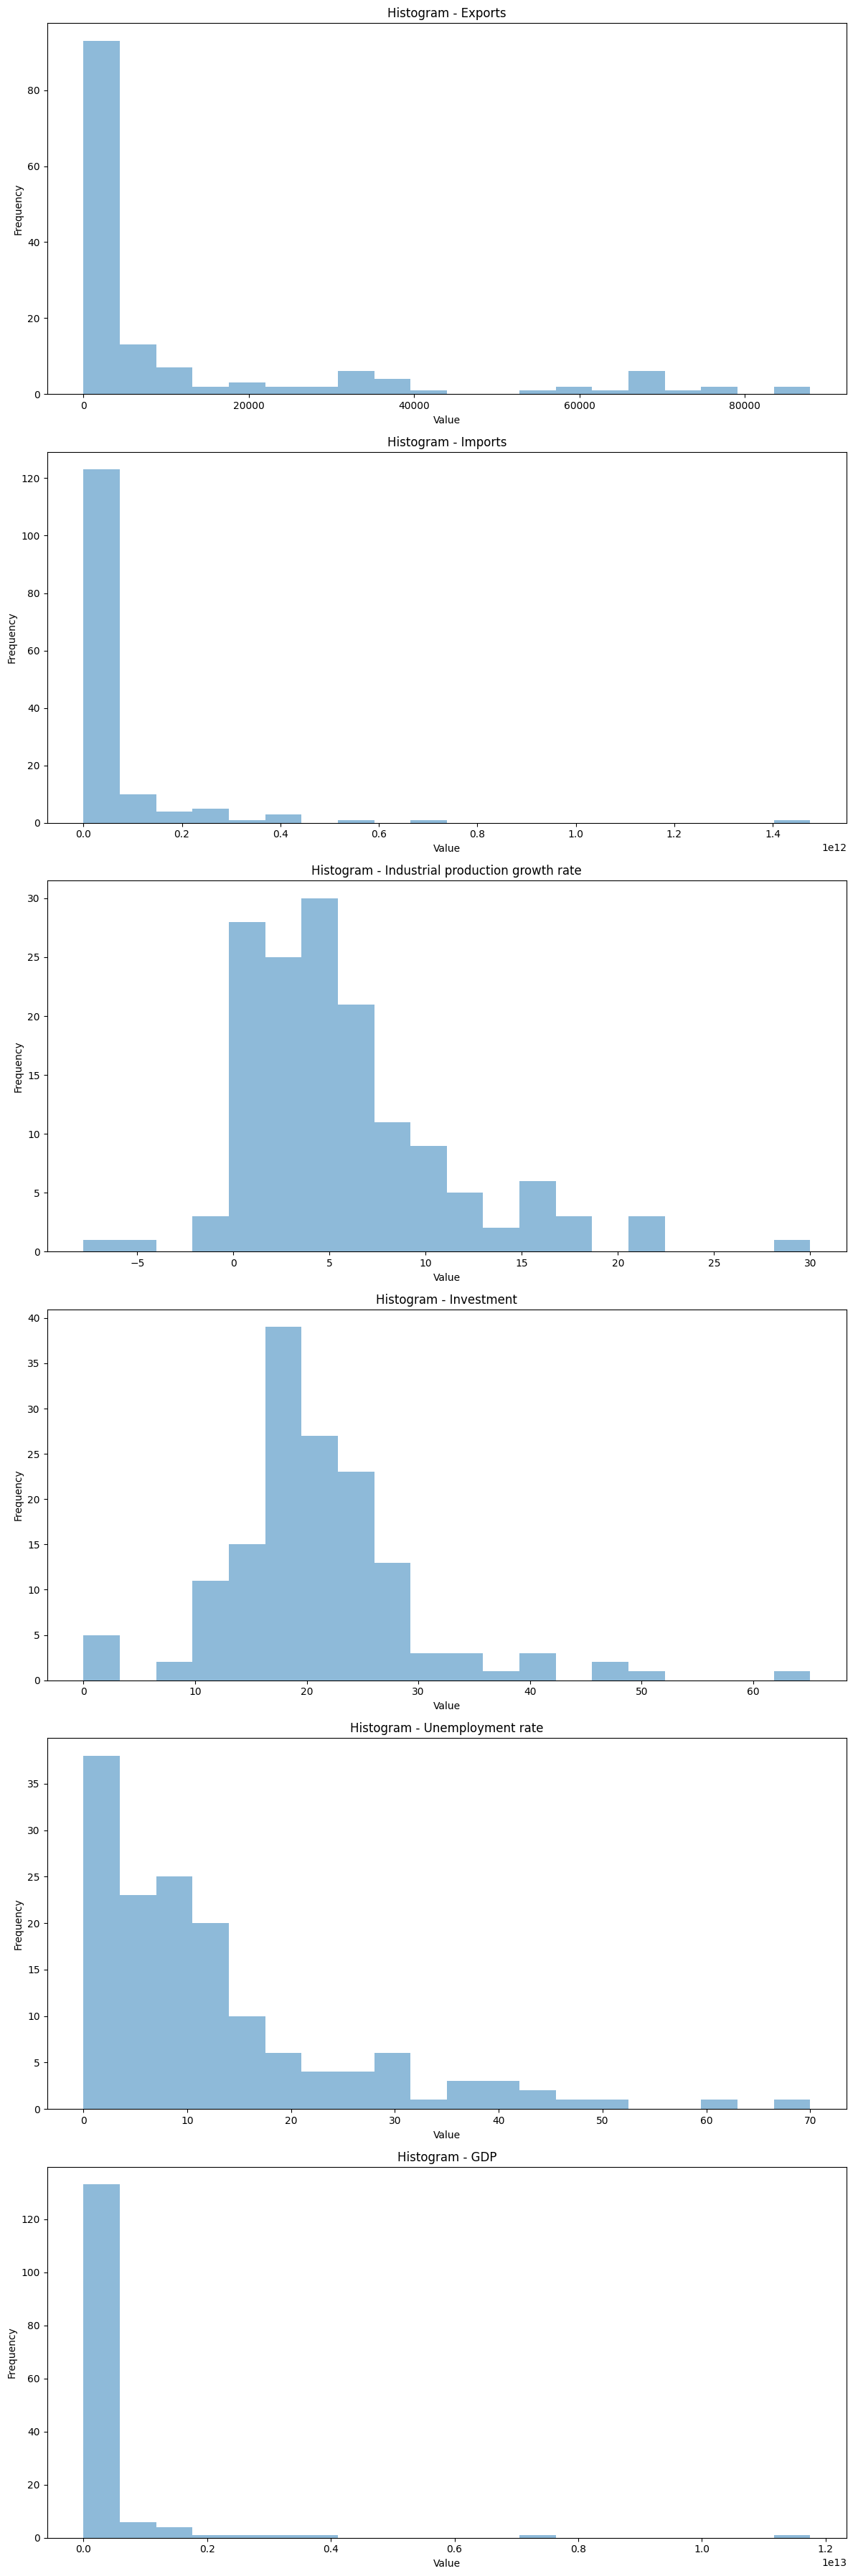

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(selected_col), 1, figsize=(12, 6*len(selected_col)))

for i, column in enumerate(selected_col):
    axes[i].hist(data[column], bins=20, alpha=0.5)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Histogram - {}'.format(column))

fig.tight_layout()
plt.show()


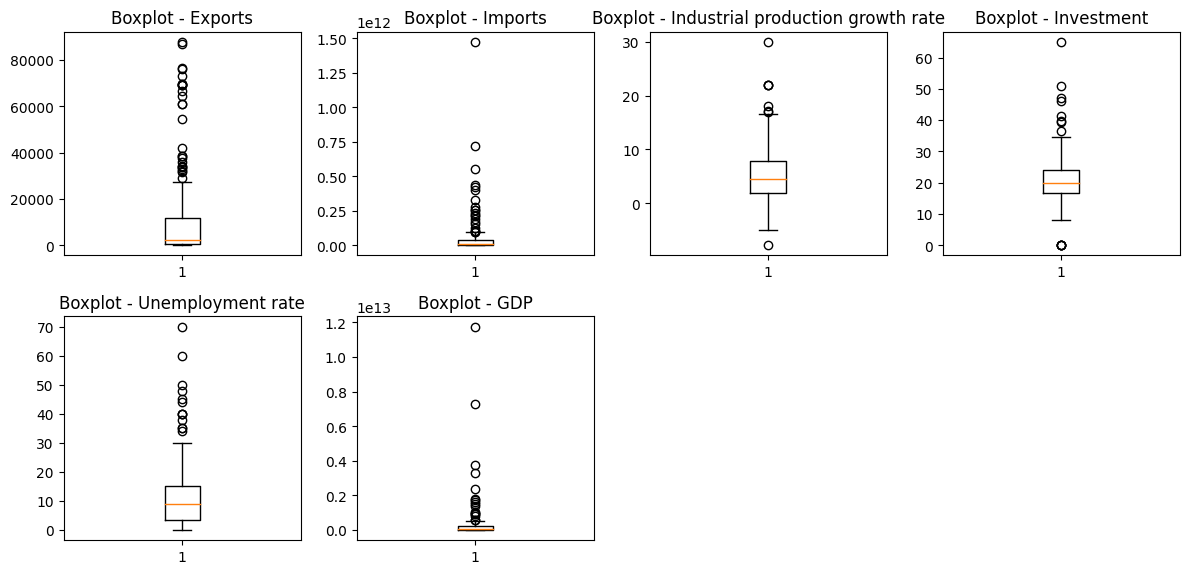

In [ ]:
# Ubah tipe data kolom menjadi numerik
data[selected_col] = data[selected_col].apply(pd.to_numeric, errors='coerce')

# Visualisasi Boxplot untuk setiap kolom di selected_col
plt.figure(figsize=(12, 6))
for i, column in enumerate(selected_col):
    plt.subplot(2, 4, i+1)
    plt.boxplot(data[column].dropna())
    plt.title('Boxplot - {}'.format(column))
plt.tight_layout()
plt.show()

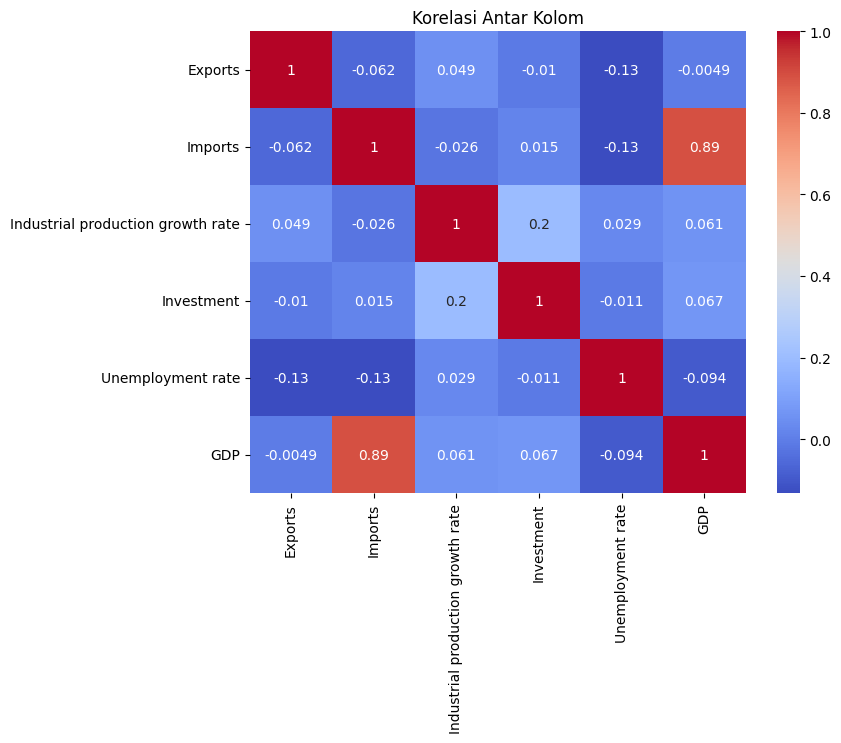

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = data[selected_col].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Kolom')
plt.show()

## Fungsi yang digunakan

### Fungsi untuk menghitung nilai b

In [ ]:
# Fungsi untuk menghitung nilai b
def b(matriks_x, matriks_y):
  XtransposeX = np.transpose(matriks_x).dot(matriks_x)
  XtransposeY = np.transpose(matriks_x).dot(matriks_y)
  b = (np.linalg.inv(XtransposeX)).dot(XtransposeY)

  return b

### Fungsi untuk membuat matriks X

In [ ]:
# Fungsi untuk membuat matriks X
def matriks_x(dataset):
  mat = np.column_stack([np.ones(len(dataset)),dataset])
  return(mat)

### Fungsi untuk menghitung nilai g

In [ ]:
# Fungsi untuk menghitung nilai g
def g(matriks_x, matriks_y):
  g = np.transpose(matriks_x).dot(matriks_y)
  return g

### Fungsi untuk menghitung nilai r atau JKR

In [ ]:
# Fungsi untuk menghitung nilai r atau JKR
def r(b, g, matriks_y):
     return np.array(np.sum(b * g) - (np.sum(matriks_y)/len(matriks_y)))

### Fungsi untuk menghitung nilai s^2

In [ ]:
# Fungsi untuk menghitung nilai s^2
def s_kuadrat(jkt, jkr, k):
  n = len(df)
  skud = (jkt - jkr)/(n - k - 1)
  return(skud)

## Analisis dan Hasil

Memulai proses regresi linear bertahap

### Melakukan inisiasi awal

In [ ]:
# Melakukan inisiasi awal
Xdata = df[['Exports (x1)', 'Imports (x2)', 'Industrial production growth rate (x3)','Investment (x4)', 'Unemployment rate (x5)' ]]
col_x = ['Exports (x1)', 'Imports (x2)', 'Industrial production growth rate (x3)','Investment (x4)', 'Unemployment rate (x5)' ]
Ydata = df[['GDP (y)']]
n = len(df)
matriksY = np.array(Ydata)

### Menghitung nilai JKT

In [ ]:
# Menghitung nilai JKT
JKT = np.array(np.sum((matriksY-np.mean(matriksY))**2))
print(JKT)

2.2261034213882458e+26


### Langkah pertama

Variabel rmaks diinisialisasi dengan nilai 0 untuk menyimpan nilai R atau JKR (Koefisien Determinasi Berganda) tertinggi. var_rmaks digunakan untuk menyimpan nama variabel yang memiliki nilai R tertinggi.

Dilakukan perulangan sebanyak variabel independen (kolom X) yang ada. Di setiap iterasi, dilakukan langkah-langkah berikut:
a. Membuat  matriksX: Membentuk matriksX menggunakan data dari kolom X yang sedang diproses.
b. Menghitung nilai b dan g: Menghitung nilai koefisien regresi (b) dan konstanta regresi (g) menggunakan matriks X dan matriks Y.
c. Menghitung nilai R: Menghitung nilai R atau JKR menggunakan nilai b, g, dan matriks Y.
d. Membandingkan nilai R: Membandingkan nilai R dengan nilai tertinggi yang sudah disimpan sebelumnya. Jika nilai R lebih besar, maka nilai R tertinggi dan variabel terkait akan diperbarui.

Setelah perulangan selesai, dilakukan uji hipotesis untuk menentukan apakah variabel terpilih (variabel dengan nilai R tertinggi) dapat dimasukkan ke dalam model regresi atau tidak. Langkah-langkah uji hipotesis yang dilakukan antara lain:
a. Menghitung F hitung: Menghitung nilai F hitung menggunakan rumus yang sesuai dengan variabel terpilih.
b. Menghitung F alpha: Menghitung nilai F alpha berdasarkan tingkat signifikansi (alpha) yang telah ditentukan.
c. Membandingkan nilai F hitung dan F alpha: Jika nilai F hitung lebih besar dari nilai F alpha, maka H0 (hipotesis nol) ditolak, dan variabel terpilih masuk ke dalam model. Jika tidak, H0 diterima, dan variabel terpilih tidak dimasukkan ke dalam model.

Lalu Variabel yang terpilih akan diperbarui di dalam list var_fix, dan variabel tersebut akan dihapus dari list kolom X (col_x).

In [ ]:
rmaks = 0 # menginisiasi variable rmaks untuk menyimpan nilai r atau jkr yang tertinggi
print('Langkah pertama')

for i in Xdata[col_x]: #melakukan perulangan sebanyak i variable independen untuk menemukan nilai r tertinggi
  matriksX = matriks_x(Xdata[i]) #membuat matriks x dengan data kolom i

  #menghitung nilai b dan g
  nilai_b = b(matriksX, matriksY)
  nilai_g = g(matriksX, matriksY)

  nilai_r = r(nilai_b, nilai_g, matriksY) #menghitung nilai JKR masing - masing kolom

  #mencari nilai r yang paling besar
  if rmaks <= nilai_r:
    rmaks = nilai_r
    var_rmaks = i
  print(f'R {i}: {nilai_r}')

print(f'Maka, R yang terpilih adalah :{rmaks}, yaitu variable {var_rmaks}')
var_fix = [] # membuat list untuk menyimpan variabel atau kolom x yang dapat dimasukkan ke model

# melakukan uji hipotesis apakah variable tersebut dapat masuk ke dalam model atau tidak
k = len(var_fix) + 1 #derajat kebebasan

fhitung = rmaks/s_kuadrat(JKT,rmaks,k) # menghitung fhitung variabel tersebut
print(f'\nF hitungnya: {fhitung}')
falpha = f.ppf(1 - 0.1, 1, n - 1 - 1) #alpha yang digunakan merupakan 0,1
print(f'Falpha {0.1},{1},{n - k -1}:{falpha}')

if fhitung > falpha:
  print(f'Tolak H0, sehingga variabel {var_rmaks} masuk ke dalam model')
  print(f'Nilai R^2 {rmaks/JKT}')
  col_x.remove(var_rmaks) # menghapus variabel yang terpilih dari list kolom/variabel x
  var_fix.append(var_rmaks) # menambahkan variabel yang terpilih ke dalam list var_fix
else:
  print(f'Terima Ho, sehingga variabel {var_rmaks} tidak masuk ke dalam model')

print('\nPeubah terpilih pada langkah pertama : ', [var_fix])
print("---------------------------------------------------")

Langkah pertama
R Exports (x1): 2.0493911531914893e+25
R Imports (x2): 1.980406023839918e+26
R Industrial production growth rate (x3): 2.132891221654838e+25
R Investment (x4): 2.1495152791003023e+25
R Unemployment rate (x5): 2.2438603412962725e+25
Maka, R yang terpilih adalah :1.980406023839918e+26, yaitu variable Imports (x2)

F hitungnya: 1184.8708550004312
Falpha 0.1,1,147:2.7399698766516196
Tolak H0, sehingga variabel Imports (x2) masuk ke dalam model
Nilai R^2 0.8896289385355216

Peubah terpilih pada langkah pertama :  [['Imports (x2)']]
---------------------------------------------------


### Langkah kedua

iterasi_langkah dan k merupakan variabel untuk melacak iterasi langkah dan jumlah variabel yang sudah dipilih dalam model.
iterasi_langkah diinisialisasi dengan nilai 2 karena langkah pertama sudah dilakukan sebelumnya.
Perulangan utama (while True):

Perulangan ini akan berjalan terus menerus sampai tidak ada lagi variabel yang dapat masuk ke dalam model.
Setiap iterasi akan mencari variabel dengan nilai JKR (r) paling tinggi dari variabel yang belum dipilih.
Menghitung nilai r( kolom[i] | kolom[var_fix] ):

Perulangan ini digunakan untuk menghitung nilai r untuk setiap variabel i yang belum dipilih, dengan mempertimbangkan variabel yang sudah ada dalam var_fix.
matriksX dan matriksFix dibuat untuk menggabungkan kolom var_fix dengan kolom i untuk perhitungan selanjutnya.
Nilai b dan g dihitung untuk matriksX dan matriksFix menggunakan fungsi b() dan g() yang sesuai.
Nilai r_pengaruh dihitung dengan mengurangi nilai r untuk matriksFix dari nilai r untuk matriksX.
Memilih variabel dengan r (JKR) tertinggi:

Setiap iterasi akan memperbarui nilai r_pengaruh_maks dan var_r_pengaruh_maks jika nilai r_pengaruh saat ini lebih besar dari yang sebelumnya.
Jika sudah selesai mencari r_pengaruh terbesar untuk setiap variabel, variabel var_r_pengaruh_maks akan menjadi variabel terpilih untuk iterasi saat ini.
Uji hipotesis:

Setelah variabel terpilih ditentukan, dilakukan uji hipotesis untuk memeriksa apakah variabel tersebut dapat masuk ke dalam model.
F-hitung dihitung dengan membagi r_pengaruh terpilih dengan s_kuad menggunakan variabel fhitung.
F-alpha dengan tingkat signifikansi 10% (alpha=0.1) dihitung menggunakan fungsi f.ppf() dan disimpan dalam variabel falpha.
Jika fhitung lebih besar dari falpha, maka H0 ditolak dan variabel var_r_pengaruh_maks masuk ke dalam model. Variabel tersebut kemudian dihapus dari col_x dan ditambahkan ke var_fix.
Mengecek keberartian variabel sebelumnya:

Setelah variabel baru dimasukkan ke dalam model, dilakukan pengecekan untuk setiap variabel yang sudah ada dalam var_fix sebelum variabel baru ditambahkan.
MatriksCek dan nilai bbb dan ggg dihitung untuk masing-masing variabel dalam var_fix.
Nilai r_pengaruh_1 dihitung dengan mengurangi nilai r untuk matriksCekVar dari nilai r untuk matriksCek.
F-hitung dan falpha dihitung seperti pada langkah uji hipotesis sebelumnya.
Jika fhitung lebih besar dari falpha, maka H0 ditolak dan variabel tersebut masih berarti dalam model. Variabel tersebut tetap dalam var_fix dan nilai k diperbarui.
Jika fhitung tidak lebih besar dari falpha, maka H0 diterima dan variabel tersebut dianggap tidak berarti dalam model. Variabel tersebut dihapus dari var_fix dan kembali ke col_x.
Iterasi langkah dan kondisi berhenti:

Setelah satu iterasi selesai, nilai iterasi_langkah diperbarui dengan menambah 1.
Jika tidak ada lagi variabel yang dapat masuk ke dalam model (tidak ada variabel dengan r_pengaruh yang lebih besar dari nol), perulangan dihentikan dengan menggunakan break.
Output:

Setelah perulangan selesai, hasil akhir berupa variabel yang terpilih akan dicetak sebagai var_fix.

In [ ]:
# inisialisasi variabel
iterasi_langkah = 2
k = len(var_fix) + 1

while True:
  print(f'\nLangkah ke - {iterasi_langkah}')
  r_pengaruh_maks = 0

  # menghitung nilai r( kolom[i] | kolom[var_fix] )
  for i in Xdata[col_x]:
    matriksX = matriks_x(Xdata[var_fix + [i]]) # membuat matriks yang berisi kolom[var_fix] + setiap kolom variabel x
    matriksFix = matriks_x(Xdata[var_fix]) # membuat matriks yang berisi kolom [var_fix]

    # menghitung nilai b dan g untuk matriks kolom[var_fix] + setiap kolom variabel x
    nilai_b = b(matriksX, matriksY)
    nilai_g = g(matriksX, matriksY)

    # menghitung nilai b dan g untuk matriks kolom[var_fix]
    nilai_b_fix = b(matriksFix, matriksY)
    nilai_g_fix = g(matriksFix, matriksY)

    nilai_r_pengaruh = r(nilai_b, nilai_g, matriksY) - r(nilai_b_fix, nilai_g_fix, matriksY) # menghitung nilai r( kolom[i] | kolom[var_fix] )

    # mencari nilai r atau JKR yang paling tinggi
    if r_pengaruh_maks <= nilai_r_pengaruh:
      r_pengaruh_maks = nilai_r_pengaruh
      var_r_pengaruh_maks = i
      s_kuad = s_kuadrat(JKT, r_pengaruh_maks, k)
    print(f'R {i} | {var_fix}: {nilai_r_pengaruh}')

  print(f'Maka, R yang terpilih adalah :{r_pengaruh_maks}, yaitu variable {var_r_pengaruh_maks}')

  # melakukan uji hipotesis apakah variable tersebut dapat masuk ke dalam model atau tidak
  print(f'\nApakah variabel {var_r_pengaruh_maks} dapat masuk ke model?')

  fhitung = r_pengaruh_maks/s_kuad
  print(f'F hitungnya: {fhitung}')
  falpha = f.ppf(1 - 0.1, 1, n - k - 1) #falpha dengan alpha 10% atau 0,1
  print(f'falpha {0.1},{1},{n - k -1}:{falpha}')

  if fhitung > falpha:
    print(f'Tolak H0, sehingga variabel {var_r_pengaruh_maks} masuk ke dalam model')
    if var_r_pengaruh_maks in col_x:
        col_x.remove(var_r_pengaruh_maks) # menghapus variabel tersebut dari kolom x
        var_fix.append(var_r_pengaruh_maks) # menambahkan variabel tersebut ke list var_fix
  else:
    print(f'Terima H0, sehingga variabel {var_r_pengaruh_maks} tidak masuk ke dalam model')
    break # menghentikan proses perulangan ketika sudah tidak ada variabel lagi yang dapat masuk ke dalam model

  # mengecek keberartian variabel sebelumnya di dalam model apabila sudah terdapat variable baru
  for i in var_fix[0:-1]:
    print(f'\nApakah peubah {i} masih berarti dalam model ?')

    # membuat matriks dari dataf[var_fix] serta menghitung nilai b dan g
    matriksCek = matriks_x(df[var_fix])
    nilai_bb = b(matriksCek, matriksY)
    nilai_gg = g(matriksCek, matriksY)

    # membuat matriks dari dataf[i] serta menghitung nilai b dan g
    matriksCekVar = matriks_x(df[i])
    nilai_bbb = b(matriksCekVar, matriksY)
    nilai_ggg = g(matriksCekVar, matriksY)

    nilai_r_pengaruh_1 = r(nilai_bb, nilai_gg, matriksY) - r(nilai_bbb, nilai_ggg, matriksY)

    fhitung = nilai_r_pengaruh_1/s_kuad
    print(f'F hitungnya: {fhitung}')

    #falpha dengan alpha 10% atau 0,1
    falpha = f.ppf(0.1, 1, n - k - 1)
    print(f'falpha {0.1},{1},{n - k -1}:{falpha}')

    if fhitung > falpha:
      print(f'Tolak H0, sehingga variabel {i} masih berarti di dalam model')
      k = k + 1
    else:
      print(f'Terima Ho, sehingga variabel {i} tidak berarti di dalam model')
      col_x.append(i)
      var_fix.remove(i)

    print(f'Nilai R^2 : {r_pengaruh_maks/JKT}')
    print(f'\nPeubah terpilih pada langkah ke - {iterasi_langkah} : ', [var_fix])
    print("---------------------------------------------------")
  iterasi_langkah += 1
print(f'\nMaka, semua peubah yang terpilih adalah {var_fix}')


Langkah ke - 2
R Exports (x1) | ['Imports (x2)']: 5.695532660457688e+23
R Industrial production growth rate (x3) | ['Imports (x2)']: 1.5900606003870876e+24
R Investment (x4) | ['Imports (x2)']: 6.402133950477983e+23
R Unemployment rate (x5) | ['Imports (x2)']: 1.458498620330538e+23
Maka, R yang terpilih adalah :1.5900606003870876e+24, yaitu variable Industrial production growth rate (x3)

Apakah variabel Industrial production growth rate (x3) dapat masuk ke model?
F hitungnya: 1.0503508820123457
falpha 0.1,1,146:2.740207939320872
Terima H0, sehingga variabel Industrial production growth rate (x3) tidak masuk ke dalam model

Maka, semua peubah yang terpilih adalah ['Imports (x2)']


### Menghitung nilai koefisien akhir

In [ ]:
# menghitung nilai koefisien akhir
matriksX_Fix = matriks_x(df[var_fix])
b_fix = b(matriksX_Fix, matriksY)

for i in range (len(b_fix)):
  print(f'Nilai Koefisien b{i} : {b_fix[i]}')

Nilai Koefisien b0 : [-3.34950088e+10]
Nilai Koefisien b1 : [6.91496452]


### Mengukur error dari model yang telah dibuat

In [ ]:
mse = np.sum((matriksY - (matriksX_Fix.dot(b_fix)))**2)/(n-len(var_fix))
print(mse)

3.0446273426505254e+23


### Grafik hubungan variable independen dalam model dengan variable dependen GDP

In [ ]:
kolom_terpilih = df[['Exports (x1)', 'Imports (x2)','GDP (y)']]
print(kolom_terpilih)

     Exports (x1)  Imports (x2)       GDP (y)
0           538.0  4.018000e+11  3.745000e+12
1           893.0  7.167000e+11  2.362000e+12
2           110.0  3.621000e+10  3.102000e+11
3           162.0  9.291000e+10  1.408000e+12
4           130.0  1.211000e+11  2.519000e+11
..            ...           ...           ...
144         336.0  3.293000e+11  1.609000e+12
145         172.0  2.220000e+11  9.376000e+11
146         347.0  4.394000e+11  1.782000e+12
147       86800.0  9.810000e+10  6.117000e+11
148         790.0  1.476000e+12  1.175000e+13

[149 rows x 3 columns]


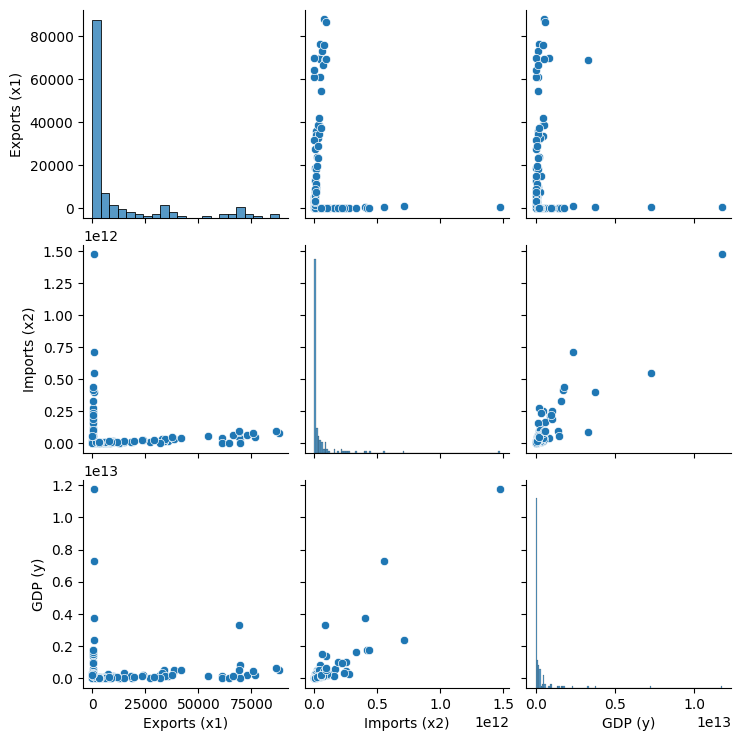

In [ ]:
sns.pairplot(kolom_terpilih)

## Kesimpulan

Note: Jika nilai F hitung lebih besar dari nilai F alpha, maka H0 (hipotesis nol) ditolak, dan variabel terpilih masuk ke dalam model. Jika tidak, H0 diterima, dan variabel terpilih tidak dimasukkan ke dalam model.

-Langkah pertama: H0 ditolak, dan variabel terpilih (Imports (x2)) dimasukkan ke dalam model regresi.
-Langkah kedua: variabel independen yang sudah terpilih (Imports (x2)) tetap, dan variabel lain dievaluasi satu per satu.
Variabel yang memiliki nilai R tertinggi adalah Industrial production growth rate (x3).
Dilakukan uji hipotesis lagi, dan dalam kasus ini, H0 diterima. Artinya, variabel Industrial production growth rate (x3) tidak signifikan dan tidak dimasukkan ke dalam model regresi.
-Variabel yang paling berpengaruh secara signifikan terhadap GDP (variabel respon) adalah Imports (x2), sedangkan variabel Industrial production growth rate (x3) tidak signifikan.
-Model regresi yang digunakan untuk memprediksi GDP menggunakan variabel Imports (x2) memiliki koefisien b0 sebesar -3.34950088e+10 dan b1 sebesar 6.91496452.
-Error dari model tersebut, yang diukur dengan MSE, adalah 3.044

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b27f1593-c78b-4e11-ae19-f678bc3212bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>